Backtest 90 days of ADA Data

### Import Libraries and Dependencies

In [28]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

### Read CSV into Pandas DataFrame

In [42]:
# Set the file path
ada_historical_df = pd.read_csv(
    Path("./Resources/ADA_Full_Historical_Data.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

# Print the DataFrame
ada_historical_df = ada_historical_df.sort_values(by='Date')
ada_historical_df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-03-08,0.042399,NaN,0.042747,0.043664,0.042069
2019-03-09,0.046810,NaN,0.042399,0.047101,0.042347
2019-03-10,0.045223,NaN,0.043223,0.046878,0.045212
2019-03-11,0.048309,NaN,0.045523,0.048417,0.044662
2019-03-12,0.047209,NaN,0.047336,0.048115,0.045702
...,...,...,...,...,...
2021-09-06,2.829600,NaN,2.907600,2.874700,2.807900
2021-09-07,2.469600,NaN,2.826700,2.561400,2.456100
2021-09-08,2.420400,NaN,2.457200,2.504300,2.396900


In [43]:
ada_historical_df.dtypes

Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

### Generate a Dual Moving Average Crossover Trading Signal

In [47]:
# Grab just the `date` and `Change %` from the dataset
signals_df = ada_historical_df.loc[:, ['Close/Last']].copy()

# Set the `date` column as the index

# Set the short window and long windows
short_window = 50
long_window = 200

# Generate the short and long moving averages (50 and 200 days, respectively)
signals_df['SMA50'] = signals_df['Close/Last'].rolling(window=short_window).mean()
signals_df['SMA200'] = signals_df['Close/Last'].rolling(window=long_window).mean()
signals_df['Signal'] = 0.0

# Generate the trading signal 0 or 1,
# where 0 is when the SMA50 is under the SMA200, and
# where 1 is when the SMA50 is higher (or crosses over) the SMA200
#signals_df['Signal'][short_window:] = np.where(
#    signals_df['SMA50'][short_window:] > signals_df['SMA200'][short_window:], 1.0, 0.0
#)

# Calculate the points in time at which a position should be taken, 1 or -1
#signals_df['Entry/Exit'] = signals_df['Signal'].diff()

# Print the DataFrame
signals_df.head(10)

,Close/Last,SMA50,SMA200,Signal
Date,,,,
2019-03-08,0.042399,NaN,NaN,0.0
2019-03-09,0.046810,NaN,NaN,0.0
2019-03-10,0.045223,NaN,NaN,0.0
2019-03-11,0.048309,NaN,NaN,0.0
2019-03-12,0.047209,NaN,NaN,0.0
2019-03-13,0.046340,NaN,NaN,0.0
2019-03-14,0.047540,NaN,NaN,0.0
2019-03-15,0.049841,NaN,NaN,0.0
2019-03-16,0.050909,NaN,NaN,0.0


<AxesSubplot:xlabel='Date'>

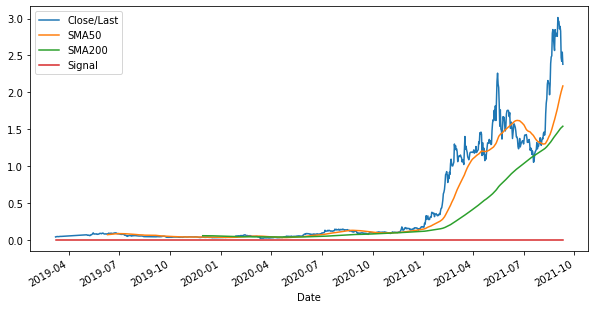

In [48]:
signals_df.plot(figsize = (10, 5))